This notebook is an introduction to Numpy and multidimensional arrays (the "tensors" in "Tensorflow"), using basic image and sound processing. 

Learning goals:

* Data is commonly represented as multidimensional arrays, whether its text, audio, or visual content.
* Python and Numpy allow very flexible indexing of arrays, e.g., [:100,10:] takes first 100 elements along the first dimension, and everything except first 10 elements along the second dimension. 
* Broadcasting means that arrays of different sizes can be added and multiplied together.

After reading, understanding, and running the code, try the following:

* Can you make the audio fade in, using a similar linear sweep like with the image? You just need to make the sweep length match the audio file, and reshape it into a 2D array instead of a 3D array.

* Try implementing ring modulation effect for the audio. Ring modulation means multiplying the sound with a sine wave. Hint: you can use ```np.sin(np.linspace(0,2.0*K*np.pi,N))``` to create a sine wave that repeats K times in a total of N points.

Model solutions are provided in the same folder, but first try to solve the problem yourself, at least for a few minutes. Think of this as a puzzle game with optional hints that you will check only if you have to.

To get started, let's import the tools we need.

In [1]:
#This pylab inline may be needed to make figures visible in Jupyter, depending on your Anaconda installation
%pylab inline
#Data manipulation
import numpy as np
#Plotting and image reading
import matplotlib.pyplot as pp
#File access
import os
import urllib.request
#Gaussian blur operation, can be used for both audio and images
from scipy.ndimage import gaussian_filter
#Audio loading
from scipy.io import wavfile
#audio playback
from IPython.display import Audio


c:\CondaEnvs\tensorflow2\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\CondaEnvs\tensorflow2\lib\site-packages\numpy\.libs\libopenblas.BNVRK7633HSX7YVO2TADGR4A5KEKXJAW.gfortran-win_amd64.dll
c:\CondaEnvs\tensorflow2\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


Populating the interactive namespace from numpy and matplotlib


Load some files to a temporary folder. If you are running this in Colab, you can also manually upload files, or access files in your Google Drive using the "Mount Google Drive" in the panel on the left.

In [2]:
if not os.path.isdir("temp"):
    os.mkdir("temp")
urllib.request.urlretrieve('https://archive.org/download/108_bpm_breakbeat_to_use/Sample00_108_BPM_EatMe_drums_-_2016_-_samples_-_music_by_EatMe_-_www.eatme.pro_-_drums_recorded_with_2_overhead_microphones_through_mix_amp_on_minidisc_to_computer..wav', 'temp/breakbeat.wav')
urllib.request.urlretrieve('https://raw.githubusercontent.com/PerttuHamalainen/MediaAI/master/Lessons/Media/GanBreederWide128.png', 'temp/image.png')
os.listdir("temp")

['breakbeat.wav', 'image.png']

Now we can actually load and show the image. ```imread``` creates a 3-dimensional Numpy array. The shape of the array is a list decribing the array dimensions or axes, in this case corresponding to height, width, and image channels.

(128, 766, 4)


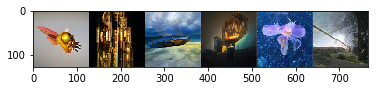

In [3]:
image=pp.imread("temp/image.png")
print(image.shape)
pp.imshow(image)

Likewise, we can load and visualize the audio. Audio is mathematically processed similar to images, but the arrays have typically one less dimension. Here, the shape defines the audio length in samples and the number of channels 

(392064, 2)


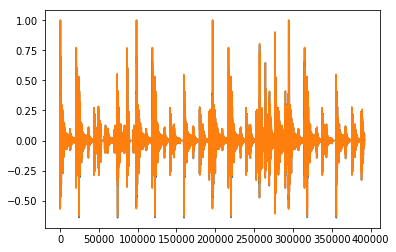

In [4]:
samplerate,sound=wavfile.read("temp/breakbeat.wav")
print(sound.shape)
pp.plot(sound)

One can use Numpy's array indexing to show only a part of the waveform. Array indices are given in brackets  ```[]```, and the colon ```:``` operator can be used to define ranges. ```a:b``` means one takes elements a...b-1, ```a:``` means elements starting from a, and ```:a``` means all elements up to a-1. ```:``` alone means all elements. Indexing starts at 0.

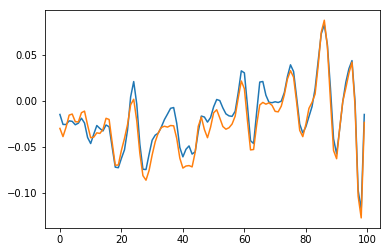

In [5]:
pp.plot(sound[:100])

Above, you should see that the plot actually contains two overlapping curves, one for each sound channel. You can show only one curve as:

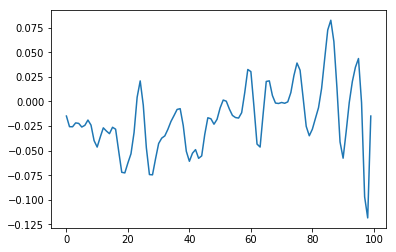

In [6]:
pp.plot(sound[:100,0])

Of course, it's often useful to also play the sound. Here, the Audio() function expects the sound with the shape (channels,samples), and our file is (samples,channels). Hence, we use the ```.T```, which transposes the data, flipping rows and columns.

In [7]:
Audio(sound.T,rate=samplerate)

Now, let's do some processing for the numbers making up the image, and visualize the results of each step. We will do the same below for audio. By default, Numpy (and Tensorflow) operations happen elementwise, and are "broadcasted" so that scalars (plain numbers) affect all array elements.

Text(0.5, 1.0, 'Clipped, scaled, and blurred')

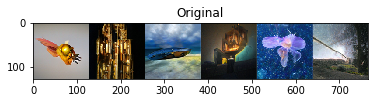

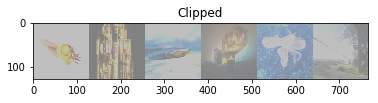

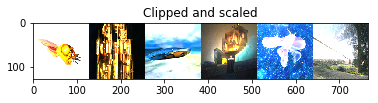

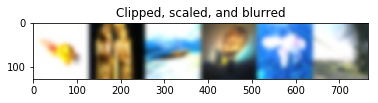

In [8]:
#Display the original for reference
pp.imshow(image)
pp.title("Original")

#Clip all color values between -0.5 and 0.5
clipped=np.clip(image,-0.5,0.5)
pp.figure()  #we want a new figure. without this, the next imshow overwrites the one above
pp.imshow(clipped)
pp.title("Clipped")

#Scale the image back to full brightness
scaled=clipped*2.0
pp.figure()
pp.imshow(scaled)
pp.title("Clipped and scaled")

#Gaussian blur with filter size 5 in pixel dimensions, and 0 in channel dimensions
#(Try what happens if you use a value larger than 0!)
blurred=gaussian_filter(scaled,sigma=[5,5,0])
pp.figure()
pp.imshow(blurred)
pp.title("Clipped, scaled, and blurred")


Now, let's try doing the same for audio

In [9]:
#Clip all samples between -0.1 and 0.1
clipped=np.clip(sound,-0.1,0.1)
Audio(clipped.T,rate=samplerate)

In [10]:
#Scale the sound back to full loudness
scaled=clipped*10.0
Audio(scaled.T,rate=samplerate)

In [11]:
#Gaussian blur with filter size 5 in pixel dimensions, and 0 in channel dimensions
#(Try what happens if you use a value larger than 0!)
blurred=gaussian_filter(scaled,sigma=[5,0])
Audio(blurred.T,rate=samplerate)

To showcase some extra plotting capabilities, let's visualize the original and processed audio waveforms (first channel only):

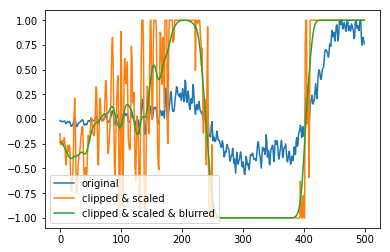

In [12]:
plotRange=500
pp.plot(sound[:plotRange,0],label="original")
pp.plot(scaled[:plotRange,0],label="clipped & scaled")
pp.plot(blurred[:plotRange,0],label="clipped & scaled & blurred")
pp.legend()  #this adds the labels to the image

Finally, let's introduce broadcasting, a concept you will encounter very often in ML & AI coding. 

Broadcasting means that when you, e.g., multiply together two arrays, dimensions with shape 1 will be expanded by virtually copying the values. 

If the first dimension is "rows" and second is "columns", an array with shape [10,5] would be 10 rows high and 10 columns wide. Now, if this array is multiplied with array of shape [10,1] (a single column), the latter is first expanded by stacking 5 copies of the column side by side so that the shape becomes [10,5]. Then, all the elements of these two arrays are multiplied together.

However, if the second array is of shape [10], Numpy doesn't know what to do, and you must first *reshape* it to [10,1]. Arrays of shape [10] and [10,1] can have exactly the same data, but the latter just tells Numpy which dimension to broadcast. 

We first create a linear sweep from 0 to 1, taking place in as many values as the image has columns:

Sweep shape (766,)


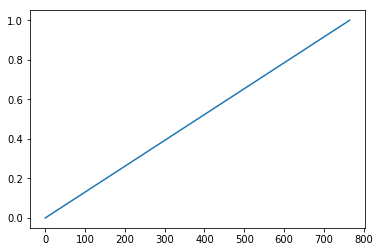

In [13]:
sweep=np.linspace(0,1,image.shape[1])
pp.plot(sweep)
print("Sweep shape",sweep.shape)

Now, we can multiply it with the image, but we first need to reshape it to a 3D array of shape (height,width,channels), same as the image. The "-1" in the new shape is a special trick to make Numpy infer that shape number based on how many elements the array contains in total.

I remember understanding tricks like this was very painful for me when I started reading Python ML & AI code, not having coded in Python before. However, it's very common, which is why I'm including it in this tutorial.

Sweep shape (1, 766, 1)


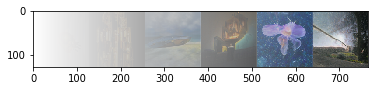

In [14]:
sweep=np.reshape(sweep,[1,-1,1])
print("Sweep shape",sweep.shape)
multiplied=sweep*image
pp.imshow(multiplied)

The image above fades in from left to right. The initial whiteness is because the sweep is also multiplying the alpha. We can make the fade begin from black by seting all alpha values to 1, again a good example of the flexibility of Numpy array indexing:

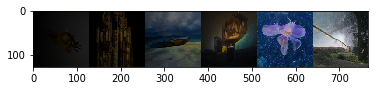

In [15]:
multiplied[:,:,3]=1
pp.imshow(multiplied)